# Project

## Multiclass Classification
## 5-level grade classification

In [1]:
#import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Import the .csv to a dataframe for easy graphing and data manipulation

df = pd.read_csv('C:/Users/Jroli/Desktop/UTH Machine Learning in Practice/Project/school_grades_dataset.csv')

print(df.shape)

df.head()

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
## There are a few variables coded as 'integer' that I want to treat as categorical ##

#create dictionaries of the different categories that will replace the intervals
#we only need one dict for Medu and Fedu since the categories are the same
edu = {0:"none",
       1:"4th_grade",
       2:"5_9th_grade",
       3:"secondary",
       4:"higher"}

travel = {1:'<15',
          2:'15_to_30',
          3:'30_to_60',
          4:'>60'}

study = {1:'<2',
         2:'2_to_5',
         3:'5_to_10',
         4:'>10'}

#replace the values in the columns with the values from the dictionaries
df["Medu"].replace(edu, inplace=True)
df["Fedu"].replace(edu, inplace=True)
df["traveltime"].replace(travel, inplace=True)
df["studytime"].replace(study, inplace=True)

In [4]:
#check and see if the values have been replaced

print(df['Medu'].unique())
print(df['Fedu'].unique())
print(df['traveltime'].unique())
print(df['studytime'].unique())

['higher' '4th_grade' 'secondary' '5_9th_grade' 'none']
['higher' '4th_grade' '5_9th_grade' 'secondary' 'none']
['15_to_30' '<15' '30_to_60' '>60']
['2_to_5' '5_to_10' '<2' '>10']


The values for the few columns coded as integer that I wanted to be categorical appear to have been successfully replaced

In [5]:
## Code the multilevel outcome variable ##

#from the article we know what values of G3 correspond to the 
#letter grades used in the US and other countries

#We'll initiate the new column and assign everyone an "F"
df['G3_Eras'] = 'F'

#now we will go through line by line and code the proper grade for students
#who have a G3 score higher than 9
for i in range(len(df)):
    #an "A" is anything higher than a 15.
    if df['G3'].iloc[i] >= 16:
        df['G3_Eras'].iloc[i]='A'
    #a "B" is any 14 or 15
    elif df['G3'].iloc[i]==14 or df['G3'].iloc[i]==15:
        df['G3_Eras'].iloc[i]='B'
    #a "C" is any 12 or 13
    elif df['G3'].iloc[i]==13 or df['G3'].iloc[i]==12:
        df['G3_Eras'].iloc[i]='C'
    #a "D" is any 10 or 11
    elif df['G3'].iloc[i]==10 or df['G3'].iloc[i]==11:
        df['G3_Eras'].iloc[i]='D'
    #anything left over should be a 9 or lower, which will remain an F

#I did not use the dictionary method like above because I want to keep the G3 continuous
#variable for triple checking my recoding.  Plus it would have been a really long
#dictionary to type out and I'm prone to mistakes.  This way is a little slow, though.

C:\Users\Jroli\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='G3', ylabel='count'>

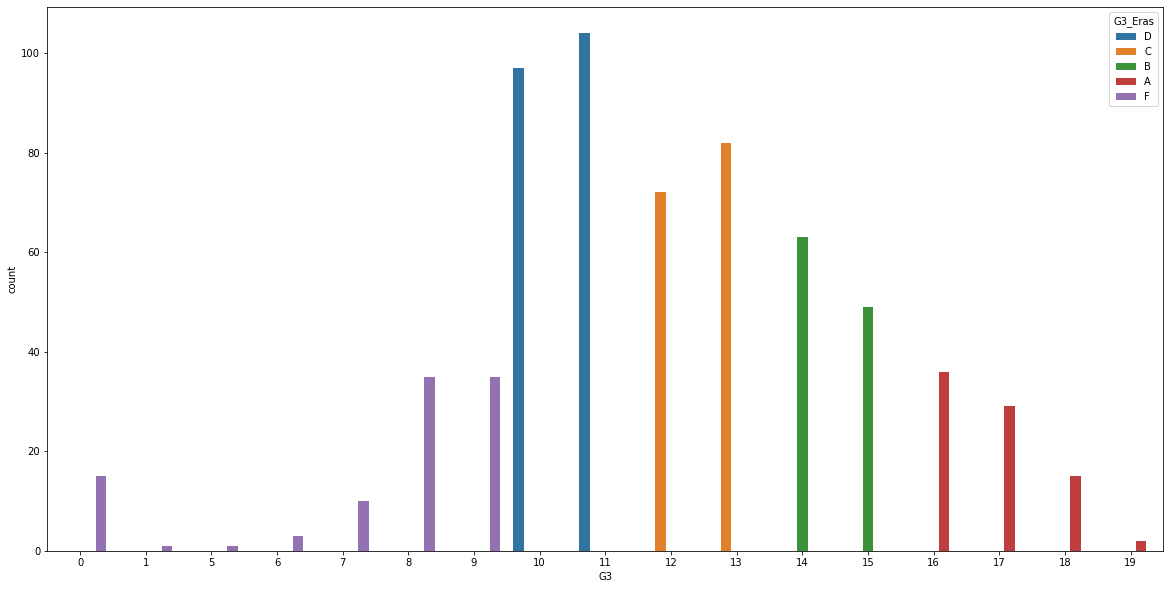

In [6]:
#I want to check my variable coding
plt.figure(figsize=(20,10))

sns.countplot(data=df, x='G3', hue='G3_Eras')

There is no overlap between the categories, so the coding has been successful.

In [7]:
#I'm going to code dummy variables, but I want to use the intact categorical variables for visualization
#so I'm going to make a copy of the dataframe.  One will get dummy coded and split into training and testing,
#the other will get subsetted after the train test split and used for visualization.

df2 = df.copy()

In [8]:
## creating dummy variables##

#the recoding of the variables above should allow for more intelligible dummy variable names

#create a list of the columns I want recoded
columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
           'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic']

df = pd.get_dummies(df, columns=columns)

df.head()

,age,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,0,4,3,4,1,1,3,4,0,...,1,0,0,1,0,1,1,0,1,0
1,17,0,5,3,3,1,1,3,2,9,...,1,0,1,0,0,1,0,1,1,0
2,15,0,4,3,2,2,3,3,6,12,...,1,0,0,1,0,1,0,1,1,0
3,15,0,3,2,2,1,1,5,0,14,...,0,1,0,1,0,1,0,1,0,1
4,16,0,4,3,2,1,2,5,0,11,...,1,0,0,1,0,1,1,0,1,0


There are way too many columns to see all of them in the .head() command.  I'll print the column names.

In [9]:
df.columns

Index(['age', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'G3_Eras', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu_4th_grade',
       'Medu_5_9th_grade', 'Medu_higher', 'Medu_none', 'Medu_secondary',
       'Fedu_4th_grade', 'Fedu_5_9th_grade', 'Fedu_higher', 'Fedu_none',
       'Fedu_secondary', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_15_to_30',
       'traveltime_30_to_60', 'traveltime_<15', 'traveltime_>60',
       'studytime_2_to_5', 'studytime_5_to_10', 'studytime_<2',
       'studytime_>10', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       '

All of the categorical variables now have dummy encoded variables.  It's important to note that all of the categories now have a dummy variable.  I'll need to delete one level of each dummy coded variable for one-hot encoding.

In [10]:
#drop at least one column from each categorical variable for one hot encoding. 
#also get rid of the 'G3' variable since we won't be using it.
#I like selecting specific columns to drop because the autodrop feature in pd.get_dummies
#just selects the first category.  This can lead to inconsistent one-hot encoded variables
#(e.g. a mixture of yes and no coded variables).  This way I can be consistent and help result interpretability
df.drop(columns=['G3', 'school_GP', 'sex_F', 'address_R', 'famsize_GT3', 'Pstatus_A', 'Medu_none', 'Fedu_none',
                 'Mjob_at_home', 'Fjob_at_home', 'reason_course', 'guardian_father', 'traveltime_<15', 'studytime_<2',
                 'schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no', 'internet_no',
                 'romantic_no'], inplace=True)

#moving the 'G1', 'G2', and 'G3_Eras' columns to the end
cols = list(df.columns) #Make a list of all of the columns in the df
cols.pop(cols.index('G1')) #Remove from list
cols.pop(cols.index('G2')) 
cols.pop(cols.index('G3_Eras'))
df = df[cols+['G1','G2', 'G3_Eras']] #Create new dataframe with columns in the order you want

df.columns

Index(['age', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
       'Pstatus_T', 'Medu_4th_grade', 'Medu_5_9th_grade', 'Medu_higher',
       'Medu_secondary', 'Fedu_4th_grade', 'Fedu_5_9th_grade', 'Fedu_higher',
       'Fedu_secondary', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'traveltime_15_to_30',
       'traveltime_30_to_60', 'traveltime_>60', 'studytime_2_to_5',
       'studytime_5_to_10', 'studytime_>10', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes', 'G1', 'G2', 'G3_Eras'],
      dtype='object')

In [11]:
#creating training and testing dataset
#I'm using the original dataframe for the split, and using pop to seperate the target column

target = df.pop('G3_Eras')

X_train, X_test, y_train, y_test = train_test_split(df, target , test_size=0.2, stratify=target, random_state=0)

In [12]:
#I'll drop the rows for the test set data in the copied dataframe then make some visualizations.

df2 = df2.loc[X_train.index, :]

print(X_train.shape)
print(df2.shape)

(519, 51)
(519, 34)


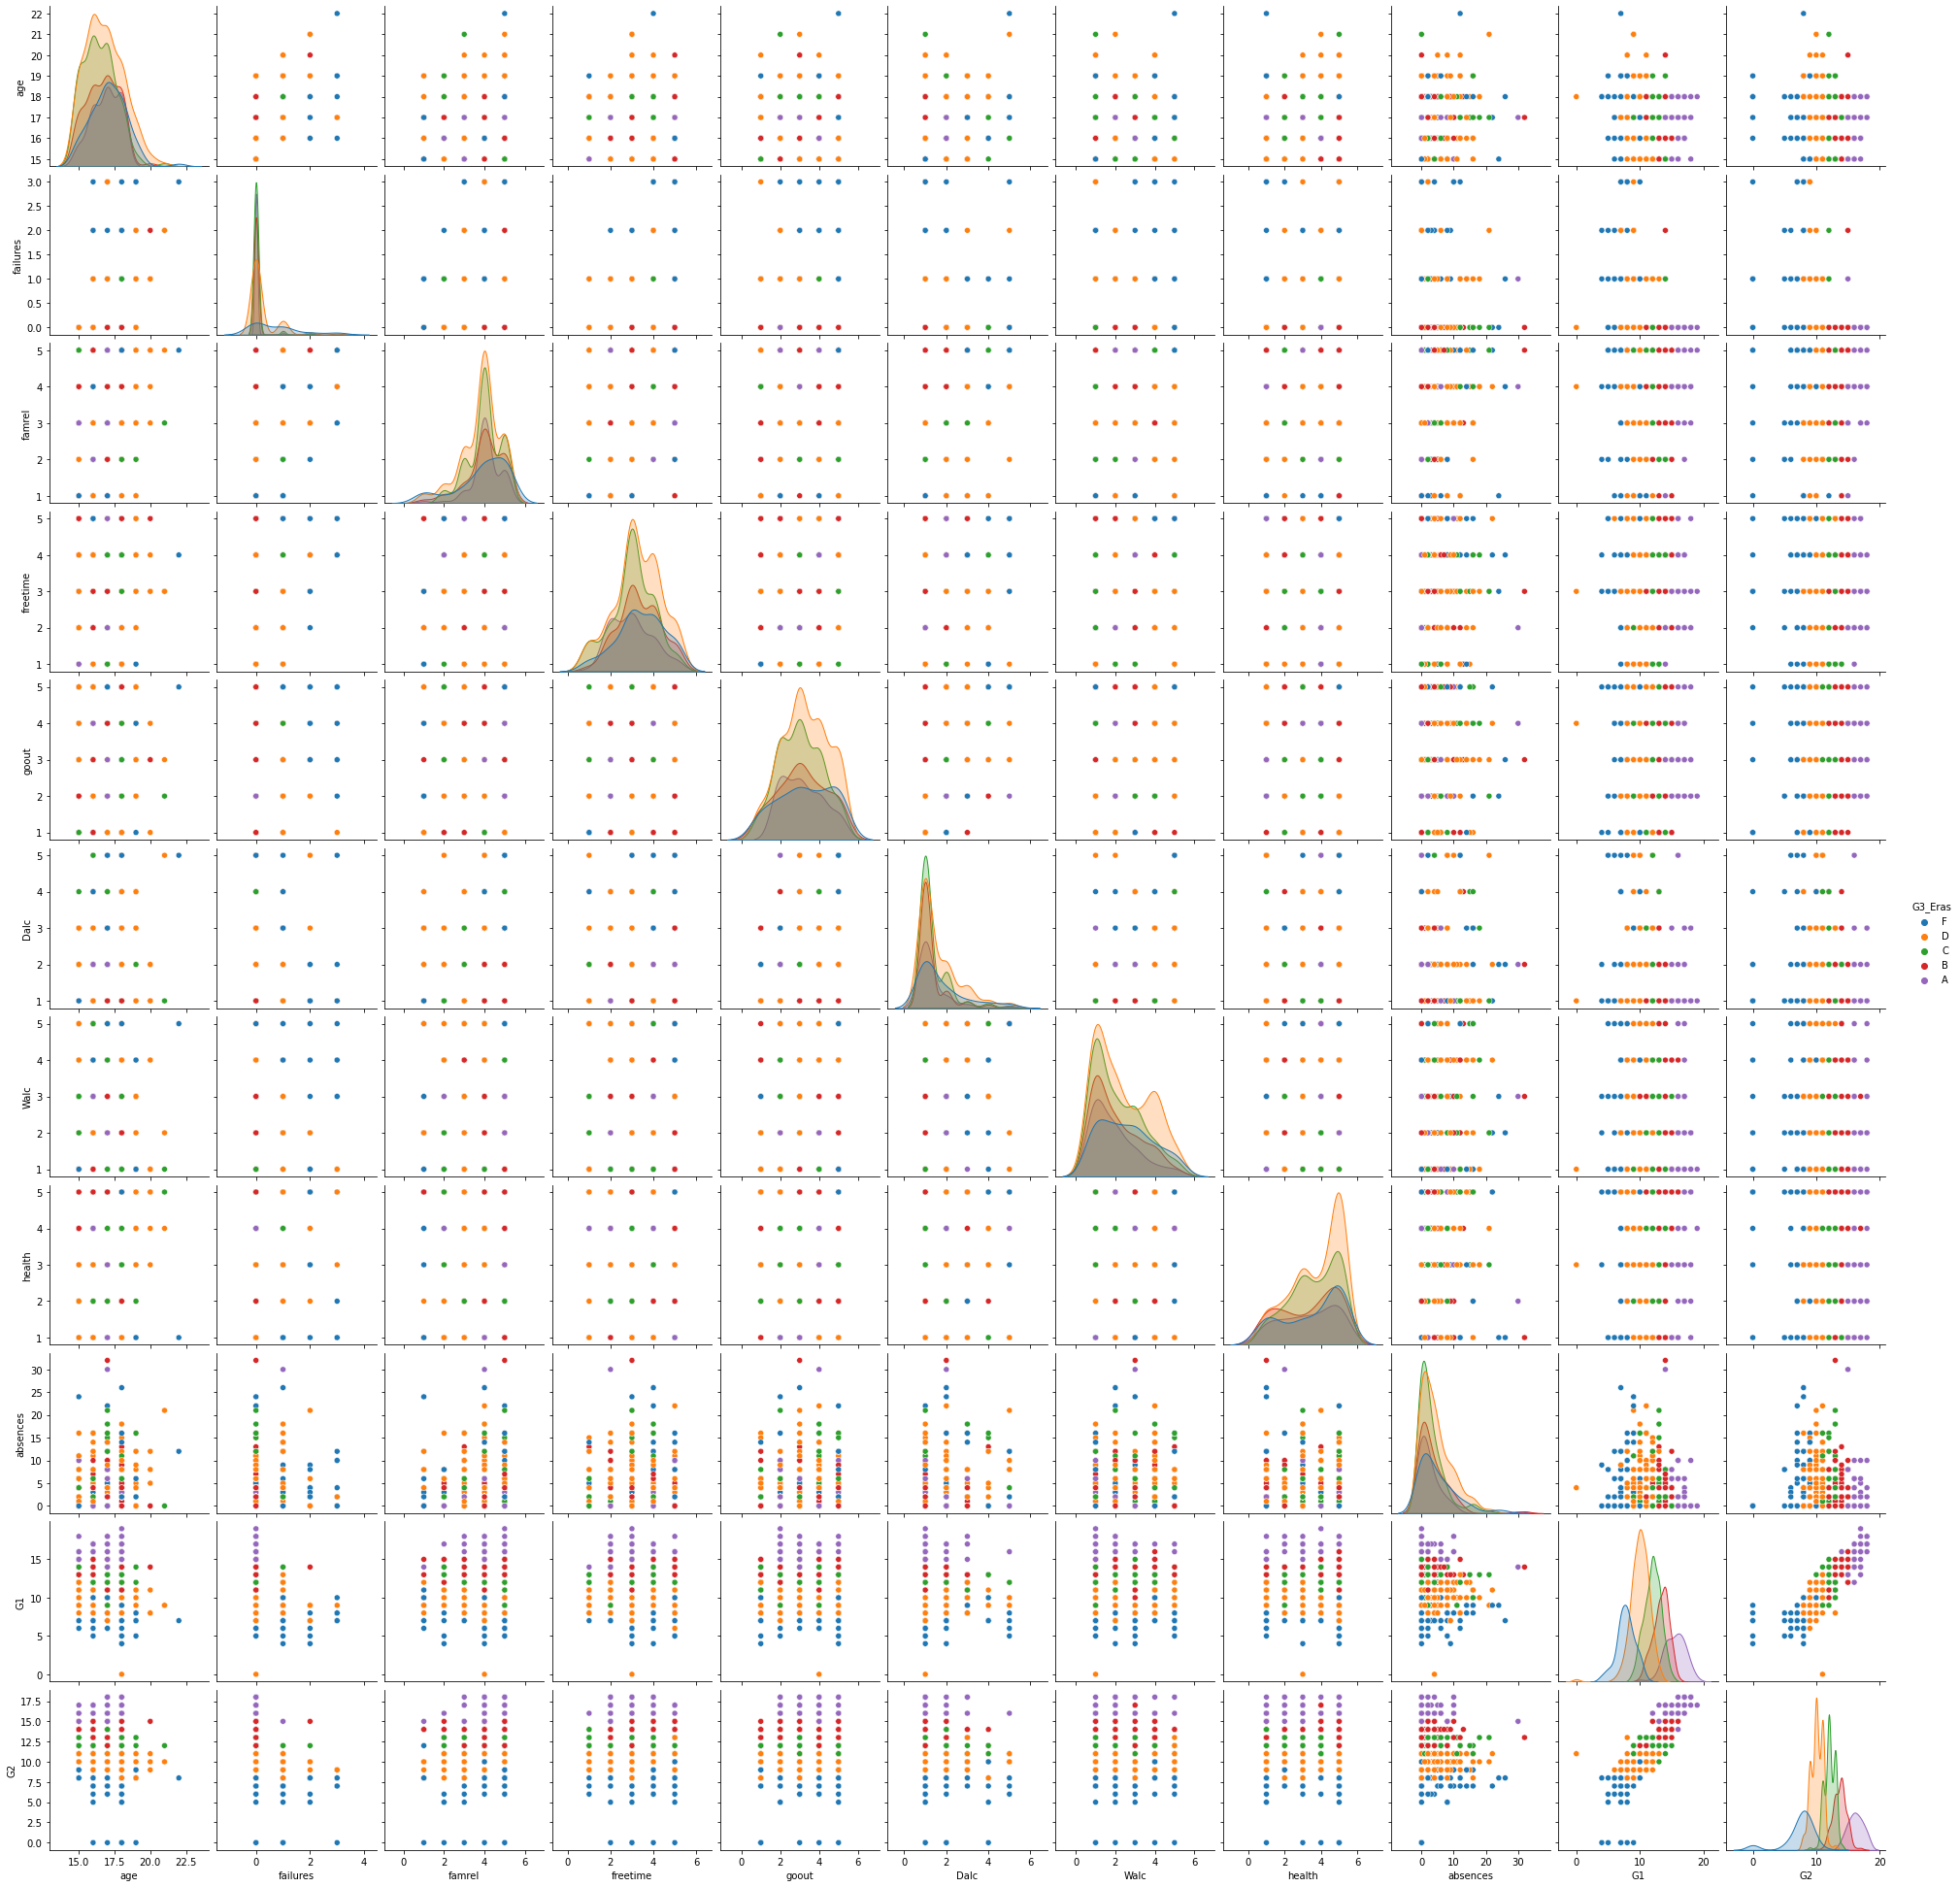

In [13]:
## Pair plot of the linear/continuous variables.

sns.pairplot(
    df2,
    x_vars=['age', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
            'health', 'absences', 'G1', 'G2'],
    y_vars=['age', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
            'health', 'absences', 'G1', 'G2'],
    hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A']
)

There are no distinct patterns, and the only variables that seem to really predict G3 performance are G1 and G2.  

<AxesSubplot:xlabel='romantic', ylabel='count'>

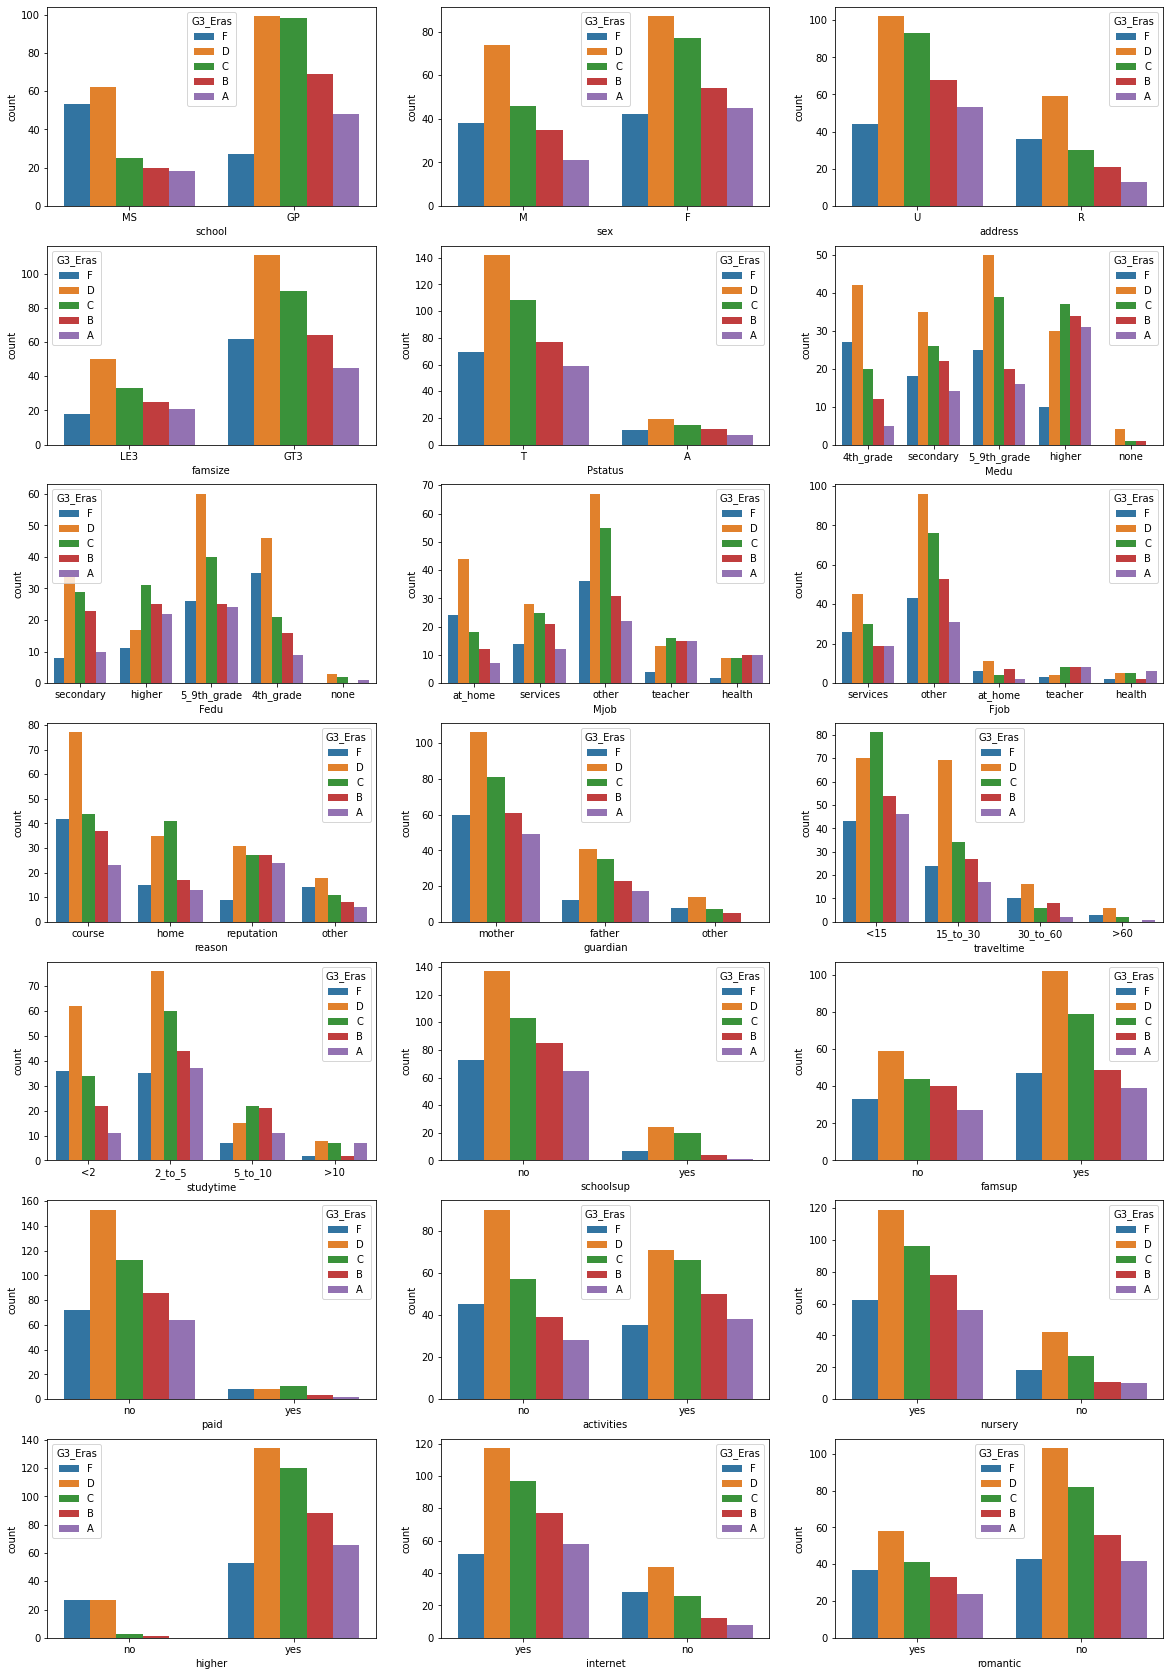

In [14]:
# Graphing the categorical variables against the G3_Eras target
fig, axs = plt.subplots(7, 3, figsize=(20,30))

sns.countplot(data=df2, ax=axs[0,0], x='school', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[0,1], x='sex', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[0,2], x='address', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[1,0], x='famsize', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[1,1], x='Pstatus', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[1,2], x='Medu', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[2,0], x='Fedu', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[2,1], x='Mjob', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[2,2], x='Fjob', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[3,0], x='reason', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[3,1], x='guardian', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[3,2], x='traveltime', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[4,0], x='studytime', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[4,1], x='schoolsup', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[4,2], x='famsup', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[5,0], x='paid', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[5,1], x='activities', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[5,2], x='nursery', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[6,0], x='higher', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[6,1], x='internet', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

sns.countplot(data=df2, ax=axs[6,2], x='romantic', hue='G3_Eras', hue_order=['F', 'D', 'C', 'B', 'A'])

<AxesSubplot:xlabel='G3_Eras', ylabel='percentage'>

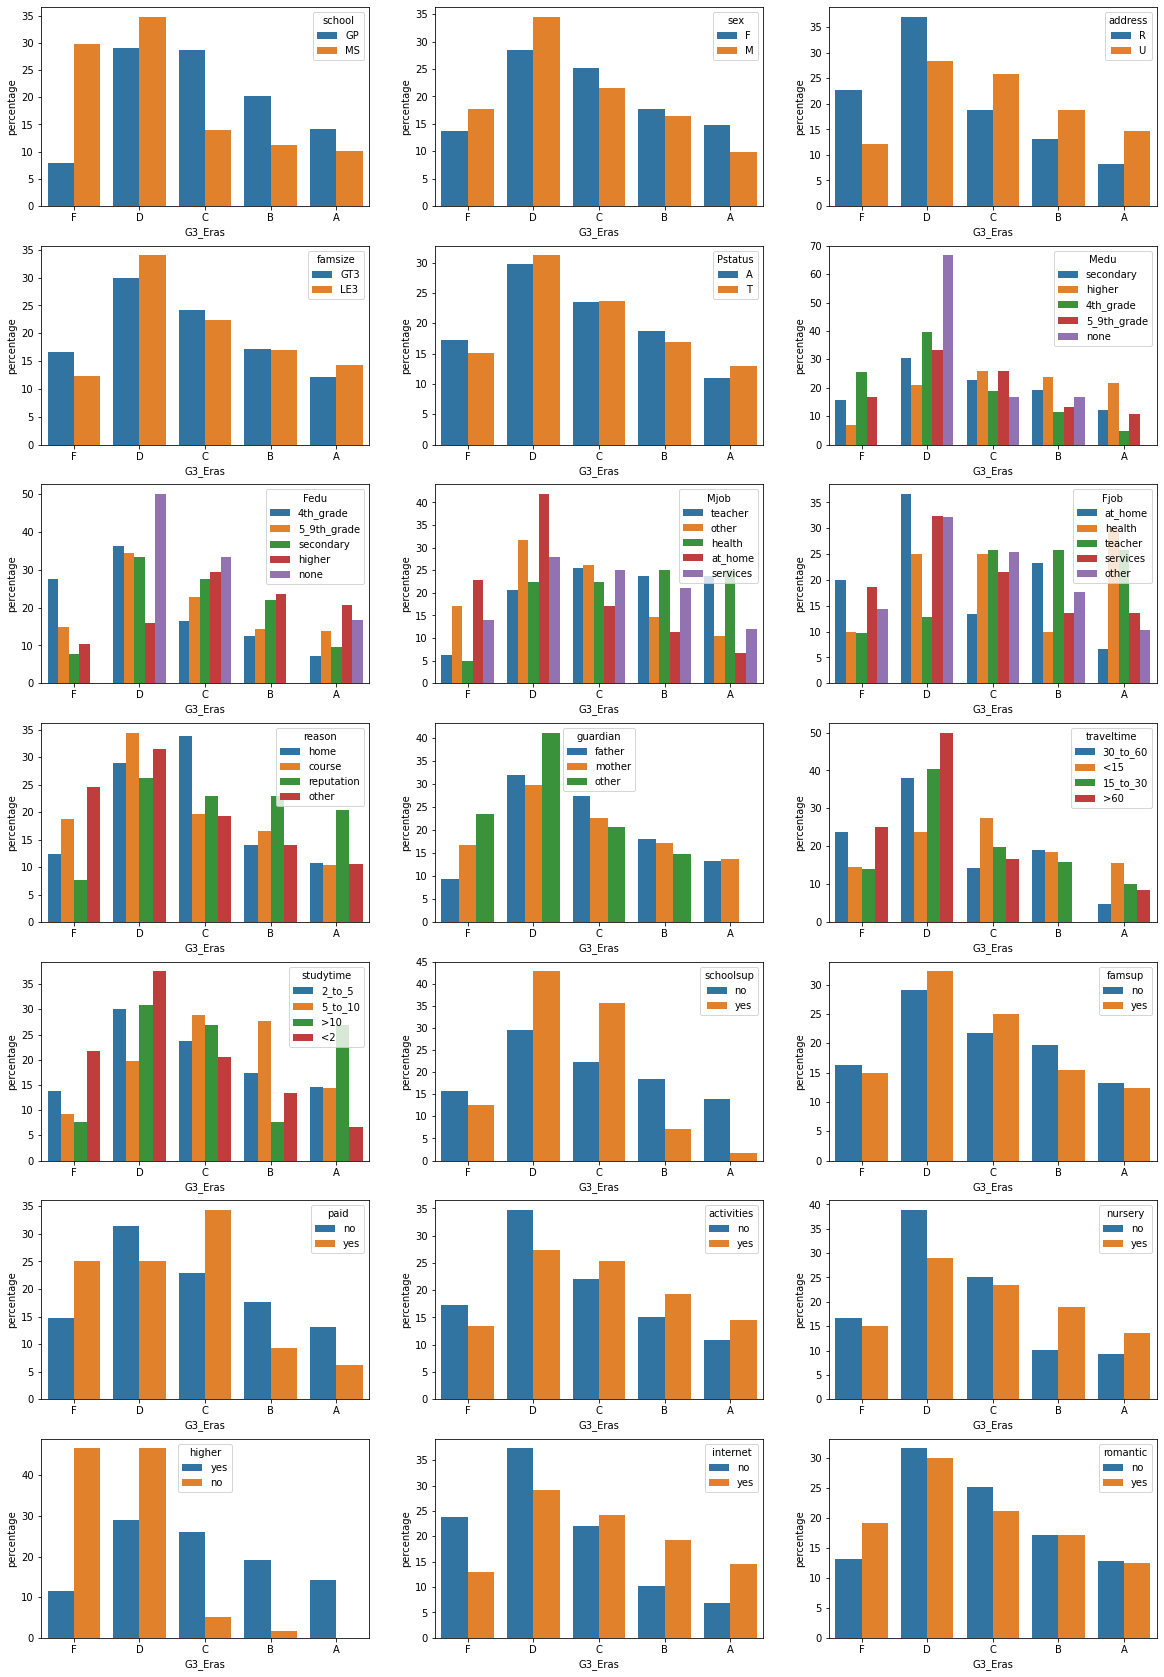

In [15]:
#looking at the relationships by percentage

fig, axs = plt.subplots(7, 3, figsize=(20,30))

#I'm using a for loop, so I need a list of the column names I want to graph
columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
           'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic']

#I also need a counter
plot=0

#for loop that will iterate over the axes positions, get the percentage breakdown for the columns I'm interested in
#then graph them in a seaborn barplot.  I also make sure to increase my counter by 1 each time.
for i in range(7):
    for j in range(3):
        plot_percentage = (df2.groupby([columns[plot]])['G3_Eras']
                                       .value_counts(normalize=True)
                                       .rename('percentage')
                                       .mul(100)
                                       .reset_index()
                                       .sort_values('G3_Eras'))
        p = sns.barplot(hue=columns[plot], y="percentage", x="G3_Eras", order=['F', 'D', 'C', 'B', 'A'],
                        ax=axs[i,j], data=plot_percentage)
        plot=plot+1

#call the plot to view it.
p

## With G1 and G2

#### Simple Logistic Regression

In [16]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#setting up the parameters to be tested using cross-validation
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'random_state':[0, 4, 16, 32], 
              'multi_class':['ovr', 'multinomial'],
              'penalty':['l2', 'none'],
              'solver':['lbfgs'],
              'max_iter':[10000]}

#create a cross-validation grid using 5 fold cross-validation
grid_LR = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_LR.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_LR.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_LR.best_score_))
print("Test-set score: {:.2f}".format(grid_LR.score(X_test, y_test)))


Best params:
{'C': 0.5, 'max_iter': 10000, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}

Best cross-validation score: 0.69
Test-set score: 0.75


In [17]:
#setting up the parameters to be tested using cross-validation
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'random_state':[0, 4, 16, 32], 
              'multi_class':['ovr'],
              'penalty':['l1', 'l2'],
              'solver':['liblinear'],
              'max_iter':[10000]}

#create a cross-validation grid using 5 fold cross-validation
grid_LR2 = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_LR2.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_LR2.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_LR2.best_score_))
print("Test-set score: {:.2f}".format(grid_LR2.score(X_test, y_test)))

Best params:
{'C': 0.1, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}

Best cross-validation score: 0.58
Test-set score: 0.55


In [18]:
## Support vector machine ##

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

#setting up a pipeline because SVC requires preprocessing for the data
#the data must be scaled before a model can be fit
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('svc', SVC(probability=True))]) 

#setting up the parameters to be tested using cross-validation
param_grid = {'svc__C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'svc__gamma': [0.01, 0.1, 0.5, 1, 5, 10], 
              'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
              'svc__degree':[1, 2, 3], 
              'svc__random_state':[0, 4, 16, 32]}

#create a cross-validation grid using 5 fold cross-validation
grid_svc = GridSearchCV(pipe, param_grid, cv=5)
grid_svc.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Test-set score: {:.2f}".format(grid_svc.score(X_test, y_test)))

Best params:
{'svc__C': 5, 'svc__degree': 1, 'svc__gamma': 5, 'svc__kernel': 'poly', 'svc__random_state': 0}

Best cross-validation score: 0.58
Test-set score: 0.66


In [19]:
from sklearn.ensemble import RandomForestClassifier

#setting up the parameters to be tested using cross-validation
param_grid = {'max_features': [1, 2, 3, 5, 10, 'log2', 'sqrt'], 
              'n_estimators': [5, 10, 15, 20, 25, 50, 100, 150, 200], 
              'max_depth': np.arange(2,10,1), 
              'criterion': ['gini', 'entropy'], 
              'min_samples_split': [2, 5, 10, 20, 40], 
              'random_state': [0, 4, 16, 32]}

#create a cross-validation grid using 5 fold cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_rf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rf.best_score_))
print("Test-set score: {:.2f}".format(grid_rf.score(X_test, y_test)))

Best params:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_split': 10, 'n_estimators': 25, 'random_state': 32}

Best cross-validation score: 0.75
Test-set score: 0.75


In [20]:
from sklearn.metrics import confusion_matrix

#predict the y values for the test set observations using the 
#best performing paramters from each of the three models tested
rf_pred = grid_rf.predict(X_test)
lr_pred = grid_LR.predict(X_test)
lr2_pred = grid_LR2.predict(X_test)
svc_pred = grid_svc.predict(X_test)

#confusion matrix for random forest
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred))

#confusion matrix for gradient boosting
print("\nLogistic Regression:")
print(confusion_matrix(y_test, lr_pred))

#confusion matrix for gradient boosting
print("\nLogistic Regression 2:")
print(confusion_matrix(y_test, lr2_pred))

#confusion matrix for Support Vector classifier
print("\nSVC:")
print(confusion_matrix(y_test, svc_pred))

Random Forest:
[[13  3  0  0  0]
 [ 4 12  7  0  0]
 [ 0  1 26  4  0]
 [ 0  0  0 37  3]
 [ 0  0  0 11  9]]

Logistic Regression:
[[13  3  0  0  0]
 [ 5 14  4  0  0]
 [ 0  3 25  3  0]
 [ 0  0  3 31  6]
 [ 0  0  0  5 15]]

Logistic Regression 2:
[[14  0  2  0  0]
 [ 6  3  9  5  0]
 [ 1  2 15 13  0]
 [ 0  0  5 31  4]
 [ 0  0  0 11  9]]

SVC:
[[13  3  0  0  0]
 [ 6 12  5  0  0]
 [ 3  5 19  4  0]
 [ 0  0  8 27  5]
 [ 0  0  0  5 15]]


In [21]:
#import statement
from sklearn.metrics import classification_report

#creating the classification report for the three models for further investigation
print('Random Forest')
print(classification_report(y_test, rf_pred))
print('\nLogistic Regression')
print(classification_report(y_test, lr_pred))
print('\nLogistic Regression 2')
print(classification_report(y_test, lr2_pred))
print('\nSupport Vector Classifier')
print(classification_report(y_test, svc_pred))

Random Forest
              precision    recall  f1-score   support

           A       0.76      0.81      0.79        16
           B       0.75      0.52      0.62        23
           C       0.79      0.84      0.81        31
           D       0.71      0.93      0.80        40
           F       0.75      0.45      0.56        20

    accuracy                           0.75       130
   macro avg       0.75      0.71      0.72       130
weighted avg       0.75      0.75      0.73       130


Logistic Regression
              precision    recall  f1-score   support

           A       0.72      0.81      0.76        16
           B       0.70      0.61      0.65        23
           C       0.78      0.81      0.79        31
           D       0.79      0.78      0.78        40
           F       0.71      0.75      0.73        20

    accuracy                           0.75       130
   macro avg       0.74      0.75      0.75       130
weighted avg       0.75      0.75      0.7

In [22]:
from sklearn.metrics import roc_auc_score

print("LR One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_LR.predict_proba(X_test), multi_class="ovr", average="macro")))

print("LR2 One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_LR2.predict_proba(X_test), multi_class="ovr", average="macro")))

print("SVC One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
     .format(roc_auc_score(y_test, grid_svc.predict_proba(X_test), multi_class="ovr", average="macro")))

print("RF One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_rf.predict_proba(X_test), multi_class="ovr", average="macro")))


LR One-vs-Rest ROC AUC scores:
0.944814 (macro)
LR2 One-vs-Rest ROC AUC scores:
0.861904 (macro)
SVC One-vs-Rest ROC AUC scores:
0.916452 (macro)
RF One-vs-Rest ROC AUC scores:
0.934823 (macro)


## With G1 but without G2

In [23]:
X_train.drop(columns=['G2'], inplace=True)

X_test.drop(columns=['G2'], inplace=True)

In [24]:
#setting up the parameters to be tested using cross-validation
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'random_state':[0, 4, 16, 32], 
              'multi_class':['ovr', 'multinomial'],
              'penalty':['l2', 'none'],
              'solver':['lbfgs'],
              'max_iter':[10000]}

#create a cross-validation grid using 5 fold cross-validation
grid_LR_G1 = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_LR_G1.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_LR_G1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_LR_G1.best_score_))
print("Test-set score: {:.2f}".format(grid_LR_G1.score(X_test, y_test)))


Best params:
{'C': 0.01, 'max_iter': 10000, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}

Best cross-validation score: 0.57
Test-set score: 0.66


In [25]:
#setting up the parameters to be tested using cross-validation
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'random_state':[0, 4, 16, 32], 
              'multi_class':['ovr'],
              'penalty':['l1', 'l2'],
              'solver':['liblinear'],
              'max_iter':[10000]}

#create a cross-validation grid using 5 fold cross-validation
grid_LR2_G1 = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_LR2_G1.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_LR2_G1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_LR2_G1.best_score_))
print("Test-set score: {:.2f}".format(grid_LR2_G1.score(X_test, y_test)))

Best params:
{'C': 0.1, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}

Best cross-validation score: 0.49
Test-set score: 0.52


In [26]:
#setting up a pipeline because SVC requires preprocessing for the data
#the data must be scaled before a model can be fit
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('svc', SVC(probability=True))]) 

#setting up the parameters to be tested using cross-validation
param_grid = {'svc__C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'svc__gamma': [0.01, 0.1, 0.5, 1, 5, 10], 
              'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
              'svc__degree':[1, 2, 3], 
              'svc__random_state':[0, 4, 16, 32]}

#create a cross-validation grid using 5 fold cross-validation
grid_svc_G1 = GridSearchCV(pipe, param_grid, cv=5)
grid_svc_G1.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_svc_G1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_G1.best_score_))
print("Test-set score: {:.2f}".format(grid_svc_G1.score(X_test, y_test)))

Best params:
{'svc__C': 5, 'svc__degree': 1, 'svc__gamma': 5, 'svc__kernel': 'poly', 'svc__random_state': 0}

Best cross-validation score: 0.45
Test-set score: 0.48


In [27]:
#setting up the parameters to be tested using cross-validation
param_grid = {'max_features': [1, 2, 3, 5, 10, 'log2', 'sqrt'], 
              'n_estimators': [5, 10, 15, 20, 25, 50, 100, 150, 200], 
              'max_depth': np.arange(2,10,1), 
              'criterion': ['gini', 'entropy'], 
              'min_samples_split': [2, 5, 10, 20, 40], 
              'random_state': [0, 4, 16, 32]}

#create a cross-validation grid using 5 fold cross-validation
grid_rf_G1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=5)
grid_rf_G1.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_rf_G1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rf_G1.best_score_))
print("Test-set score: {:.2f}".format(grid_rf_G1.score(X_test, y_test)))

Best params:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 0}

Best cross-validation score: 0.59
Test-set score: 0.60


In [28]:
#predict the y values for the test set observations using the 
#best performing paramters from each of the three models tested
rf_pred_G1 = grid_rf_G1.predict(X_test)
lr_pred_G1 = grid_LR_G1.predict(X_test)
lr2_pred_G1 = grid_LR2_G1.predict(X_test)
svc_pred_G1 = grid_svc_G1.predict(X_test)

#confusion matrix for random forest
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred_G1))

#confusion matrix for gradient boosting
print("\nLogistic Regression:")
print(confusion_matrix(y_test, lr_pred_G1))

#confusion matrix for gradient boosting
print("\nLogistic Regression 2:")
print(confusion_matrix(y_test, lr2_pred_G1))

#confusion matrix for Support Vector classifier
print("\nSVC:")
print(confusion_matrix(y_test, svc_pred_G1))

Random Forest:
[[13  1  2  0  0]
 [ 5  5  8  5  0]
 [ 1  2 18 10  0]
 [ 0  0  5 32  3]
 [ 0  0  0 10 10]]

Logistic Regression:
[[15  1  0  0  0]
 [ 3  7  7  6  0]
 [ 0  1 21  9  0]
 [ 0  0  3 34  3]
 [ 0  0  0 11  9]]

Logistic Regression 2:
[[15  0  0  1  0]
 [ 9  3  6  5  0]
 [ 5  0 12 14  0]
 [ 0  1  5 29  5]
 [ 0  0  0 12  8]]

SVC:
[[ 7  7  2  0  0]
 [ 5  9  6  3  0]
 [ 3  7 15  6  0]
 [ 2  1  9 19  9]
 [ 0  0  0  8 12]]


In [29]:
#creating the classification report for the three models for further investigation
print('Random Forest')
print(classification_report(y_test, rf_pred_G1))
print('\nLogistic Regression')
print(classification_report(y_test, lr_pred_G1))
print('\nLogistic Regression 2')
print(classification_report(y_test, lr2_pred_G1))
print('\nSupport Vector Classifier')
print(classification_report(y_test, svc_pred_G1))

Random Forest
              precision    recall  f1-score   support

           A       0.68      0.81      0.74        16
           B       0.62      0.22      0.32        23
           C       0.55      0.58      0.56        31
           D       0.56      0.80      0.66        40
           F       0.77      0.50      0.61        20

    accuracy                           0.60       130
   macro avg       0.64      0.58      0.58       130
weighted avg       0.62      0.60      0.58       130


Logistic Regression
              precision    recall  f1-score   support

           A       0.83      0.94      0.88        16
           B       0.78      0.30      0.44        23
           C       0.68      0.68      0.68        31
           D       0.57      0.85      0.68        40
           F       0.75      0.45      0.56        20

    accuracy                           0.66       130
   macro avg       0.72      0.64      0.65       130
weighted avg       0.69      0.66      0.6

In [30]:
print("LR One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_LR_G1.predict_proba(X_test), multi_class="ovr", average="macro")))

print("LR2 One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_LR2_G1.predict_proba(X_test), multi_class="ovr", average="macro")))

print("SVC One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_svc_G1.predict_proba(X_test), multi_class="ovr", average="macro")))

print("RF One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_rf_G1.predict_proba(X_test), multi_class="ovr", average="macro")))


LR One-vs-Rest ROC AUC scores:
0.884408 (macro)
LR2 One-vs-Rest ROC AUC scores:
0.828909 (macro)
SVC One-vs-Rest ROC AUC scores:
0.856215 (macro)
RF One-vs-Rest ROC AUC scores:
0.864762 (macro)


## Without G2 or G1

In [31]:
X_train.drop(columns=['G1'], inplace=True)

X_test.drop(columns=['G1'], inplace=True)

In [32]:
#setting up the parameters to be tested using cross-validation
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'random_state':[0, 4, 16, 32], 
              'multi_class':['ovr', 'multinomial'],
              'penalty':['l2', 'none'],
              'solver':['lbfgs'],
              'max_iter':[10000]}

#create a cross-validation grid using 5 fold cross-validation
grid_LR_none = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_LR_none.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_LR_none.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_LR_none.best_score_))
print("Test-set score: {:.2f}".format(grid_LR_none.score(X_test, y_test)))

Best params:
{'C': 0.01, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}

Best cross-validation score: 0.34
Test-set score: 0.37


In [33]:
#setting up the parameters to be tested using cross-validation
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'random_state':[0, 4, 16, 32], 
              'multi_class':['ovr'],
              'penalty':['l1', 'l2'],
              'solver':['liblinear'],
              'max_iter':[10000]}

#create a cross-validation grid using 5 fold cross-validation
grid_LR2_none = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_LR2_none.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_LR2_none.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_LR2_none.best_score_))
print("Test-set score: {:.2f}".format(grid_LR2_none.score(X_test, y_test)))

Best params:
{'C': 0.1, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}

Best cross-validation score: 0.34
Test-set score: 0.33


In [39]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('svc', SVC(probability=True))]) 

#setting up the parameters to be tested using cross-validation
param_grid = {'svc__C': [0.01, 0.1, 0.5, 1, 5, 10], 
              'svc__gamma': [0.01, 0.1, 0.5, 1, 5, 10], 
              'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
              'svc__degree':[1, 2, 3], 
              'svc__random_state':[0, 4, 16, 32]}

#create a cross-validation grid using 5 fold cross-validation
grid_svc_none = GridSearchCV(pipe, param_grid, cv=5)
grid_svc_none.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_svc_none.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_none.best_score_))
print("Test-set score: {:.2f}".format(grid_svc_none.score(X_test, y_test)))

Best params:
{'svc__C': 0.01, 'svc__degree': 3, 'svc__gamma': 0.5, 'svc__kernel': 'poly', 'svc__random_state': 0}

Best cross-validation score: 0.34
Test-set score: 0.37


In [35]:
#setting up the parameters to be tested using cross-validation
param_grid = {'max_features': [1, 2, 3, 5, 10, 'log2', 'sqrt'], 
              'n_estimators': [5, 10, 15, 20, 25, 50, 100, 150, 200], 
              'max_depth': np.arange(2,10,1), 
              'criterion': ['gini', 'entropy'], 
              'min_samples_split': [2, 5, 10, 20, 40], 
              'random_state': [0, 4, 16, 32]}

#create a cross-validation grid using 5 fold cross-validation
grid_rf_none = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rf_none.fit(X_train, y_train)

#print the best parameters for the best model along with the cross validation score and
#the score for the test data
print("Best params:\n{}\n".format(grid_rf_none.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rf_none.best_score_))
print("Test-set score: {:.2f}".format(grid_rf_none.score(X_test, y_test)))

Best params:
{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 0}

Best cross-validation score: 0.40
Test-set score: 0.36


In [40]:
#predict the y values for the test set observations using the 
#best performing paramters from each of the three models tested
rf_pred_none = grid_rf_none.predict(X_test)
lr_pred_none = grid_LR_none.predict(X_test)
lr2_pred_none = grid_LR2_none.predict(X_test)
svc_pred_none = grid_svc_none.predict(X_test)

#confusion matrix for random forest
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred_none))

#confusion matrix for gradient boosting
print("\nLogistic Regression:")
print(confusion_matrix(y_test, lr_pred_none))

#confusion matrix for gradient boosting
print("\nLogistic Regression 2:")
print(confusion_matrix(y_test, lr2_pred_none))

#confusion matrix for Support Vector classifier
print("\nSVC:")
print(confusion_matrix(y_test, svc_pred_none))

Random Forest:
[[ 1  3  9  3  0]
 [ 0  4 14  5  0]
 [ 0  5 11 14  1]
 [ 1  1  8 21  9]
 [ 1  1  1  7 10]]

Logistic Regression:
[[ 0  1  8  7  0]
 [ 0  1 11 11  0]
 [ 0  1 12 18  0]
 [ 0  0  5 33  2]
 [ 0  0  1 17  2]]

Logistic Regression 2:
[[ 0  1  9  6  0]
 [ 0  0 11 12  0]
 [ 0  0  9 22  0]
 [ 0  0  5 26  9]
 [ 0  0  0 12  8]]

SVC:
[[ 1  3  6  5  1]
 [ 3  6  7  5  2]
 [ 2  4 13 11  1]
 [ 1  2  8 21  8]
 [ 2  1  2  8  7]]


In [41]:
#creating the classification report for the three models for further investigation
print('Random Forest')
print(classification_report(y_test, rf_pred_none))
print('\nLogistic Regression')
print(classification_report(y_test, lr_pred_none))
print('\nLogistic Regression 2')
print(classification_report(y_test, lr2_pred_none))
print('\nSupport Vector Classifier')
print(classification_report(y_test, svc_pred_none))

Random Forest
              precision    recall  f1-score   support

           A       0.33      0.06      0.11        16
           B       0.29      0.17      0.22        23
           C       0.26      0.35      0.30        31
           D       0.42      0.53      0.47        40
           F       0.50      0.50      0.50        20

    accuracy                           0.36       130
   macro avg       0.36      0.32      0.32       130
weighted avg       0.36      0.36      0.34       130


Logistic Regression
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        16
           B       0.33      0.04      0.08        23
           C       0.32      0.39      0.35        31
           D       0.38      0.82      0.52        40
           F       0.50      0.10      0.17        20

    accuracy                           0.37       130
   macro avg       0.31      0.27      0.22       130
weighted avg       0.33      0.37      0.2

In [42]:
from sklearn.metrics import roc_auc_score

print("LR One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_LR_none.predict_proba(X_test), multi_class="ovr", average="macro")))

print("LR2 One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_LR2_none.predict_proba(X_test), multi_class="ovr", average="macro")))

print("SVC One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_svc_none.predict_proba(X_test), multi_class="ovr", average="macro")))

print("RF One-vs-Rest ROC AUC scores:\n{:.6f} (macro)"
      .format(roc_auc_score(y_test, grid_rf_none.predict_proba(X_test), multi_class="ovr", average="macro")))


LR One-vs-Rest ROC AUC scores:
0.714172 (macro)
LR2 One-vs-Rest ROC AUC scores:
0.692505 (macro)
SVC One-vs-Rest ROC AUC scores:
0.708380 (macro)
RF One-vs-Rest ROC AUC scores:
0.697071 (macro)
